In [1]:
library(tidyverse)
library(RColorBrewer)
library(repr)
library(tidymodels)

star_data <- read_csv("https://raw.githubusercontent.com/luigivicencio/dsci100-003-008/main/HTRU_2.csv", col_names = FALSE) |>
    rename("mean_ip" = X1, "sd_ip" = X2, "kurtosis_ip" = X3, 
           "skew_ip" = X4, "mean_dmsnr" = X5, "sd_dmsnr" = X6, 
           "kurtosis_dmsnr" = X7, "skew_dmsnr" = X8, "pulsar" = X9)|>
    mutate(pulsar = as_factor(pulsar)) |>
    mutate(pulsar = fct_recode(pulsar,"No" = "0", "Yes" = "1"))


star_data

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

mean_ip   sd_ip    kurtosis_ip  skew_ip     mean_dmsnr  sd_dmsnr 
1     140.56250 55.68378 -0.234571412 -0.69964840  3.1998328  19.110426
2     102.50781 58.88243  0.465318154 -0.51508791  1.6772575  14.860146
3     103.01562 39.34165  0.323328365  1.05116443  3.1212375  21.744669
4     136.75000 57.17845 -0.068414638 -0.63623837  3.6429766  20.959280
5      88.72656 40.67223  0.600866079  1.12349169  1.1789298  11.468720
6      93.57031 46.69811  0.531904850  0.41672112  1.6362876  14.545074
7     119.48438 48.76506  0.031460220 -0.11216757  0.9991639   9.279612
8     130.38281 39.84406 -0.158322759  0.38954045  1.2207358  14.378941
9     107.25000 52.62708  0.452688025  0.17034738  2.3319398  14.486853
10    107.25781 39.49649  0.465881961  1.16287712  4.0794314  24.980418
11    142.07812 45.28807 -0.320328426  0.28395251  5.3762542  29.009897
12    133.25781 44.05824 -0.081059862  0.11536151  1.6321070  12.007806
13    134.96094 49.55433 -0.135303833 -0.08046960 10.6964883  41.342044
14    117.94531 45.50658  0.325437564  0.66145946  2.8361204  23.118350
15    138.17969 51.52448 -0.031852329  0.04679717  6.3302676  31.576347
16    114.36719 51.94572 -0.094498904 -0.28798409  2.7382943  17.191891
17    109.64062 49.01765  0.137635830 -0.25669978  1.5083612  12.072901
18    100.85156 51.74352  0.393836792 -0.01124074  2.8411371  21.635778
19    136.09375 51.69100 -0.045908926 -0.27181639  9.3428094  38.096400
20     99.36719 41.57220  1.547196967  4.15410604 27.5551839  61.719016
21    100.89062 51.89039  0.627486528 -0.02649780  3.8837793  23.045267
22    105.44531 41.13997  0.142653801  0.32041968  3.5518395  20.755017
23     95.86719 42.05992  0.326386917  0.80350179  1.8327759  12.248969
24    117.36719 53.90861  0.257953441 -0.40504908  6.0183946  24.766123
25    106.64844 56.36718  0.378355072 -0.26637161  2.4364549  18.405371
26    112.71875 50.30127  0.279390953 -0.12901071  8.2817726  37.810012
27    130.85156 52.43286  0.142596727  0.01888544  2.6463211  15.654436
28    119.43750 52.87482 -0.002549267 -0.46036029  2.3653846  16.498032
29    123.21094 51.07801  0.179376819 -0.17728516  2.1070234  16.921773
30    102.61719 49.69235  0.230438984  0.19332537  1.4891304  16.004411
⋮     ⋮         ⋮        ⋮            ⋮           ⋮           ⋮        
17869  96.85938 49.82277  0.276811333 -0.33182398   1.7441472 14.764022
17870 137.37500 50.76278  0.085075173 -0.09267941   7.5610368 33.471080
17871 110.76562 55.34219  0.066099851 -0.50041490  14.3795987 45.320742
17872 119.00781 52.09104  0.215293531 -0.02022867   2.0125418 18.754594
17873 139.89844 44.28103 -0.044618449  0.10084109   1.1396321 11.196096
17874  89.45312 35.84883  0.731655618  3.10147356   1.4506689 14.204964
17875 126.55469 54.27589  0.207825362 -0.19168640   2.2943144 17.429850
17876 133.14062 43.70618 -0.012686084  0.23239435   2.0919732 13.489370
17877 111.76562 52.94359  0.671723986  0.38359393 149.8436455 97.926948
17878 118.29688 49.93282  0.144400986 -0.26927317   1.0418060 10.199265
17879  90.14844 40.78604  0.457138562  0.88551621   5.3545150 29.759511
17880 107.66406 44.46246  0.296045688  0.22776530   6.2909699 33.512873
17881 105.49219 43.50072  0.154180228  0.40811660   2.3160535 19.098507
17882 130.50000 46.14955  0.084445004 -0.10735478   1.5292642 11.757086
17883 131.00000 55.93579 -0.023598123 -0.53665128   1.1596990 10.856794
17884  84.42188 41.77556  0.757467101  1.10707476   1.3361204 12.026757
17885 106.87500 47.57133  0.199440015  0.28496422   3.0794314 20.984455
17886 133.82031 43.47816  0.136691092  0.35312123   0.9824415  9.486068
17887 127.07031 47.66356  0.006552426 -0.12363370   0.8536789 11.197206
17888 121.37500 53.24516  0.103772205 -0.36511875   1.0953177 12.239976
17889  98.72656 50.40782  0.565123614  0.24523085   0.5702341  9.011285
17890 126.62500 55.72183  0.002946216 -0.30321814   0.5342809  8.588882
17891 143.67188 45.30265 -0.045768538  0.35364267   5.1739130 26.462345
17892 118.48438 50.60848 -0.029058829 -0.02749

In [2]:
star_recipe <- recipe(pulsar ~ ., data = star_data) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) |>
    prep()


scaled_star <- bake(star_recipe, star_data)
scaled_star

mean_ip     sd_ip       kurtosis_ip skew_ip     mean_dmsnr  sd_dmsnr    
1      1.14928492  1.33479435 -0.66955083 -0.40044782 -0.31943133 -0.37061511 
2     -0.33415887  1.80221498 -0.01178443 -0.37052514 -0.37109152 -0.58890765 
3     -0.31436338 -1.05329280 -0.14522850 -0.11658960 -0.32209803 -0.23532159 
4      1.00066645  1.55321102 -0.51339427 -0.39016719 -0.30439570 -0.27565879 
5     -0.87137809 -0.85885481  0.11560548 -0.10486323 -0.38799952 -0.76308980 
6     -0.68255954  0.02171238  0.05079471 -0.21945151 -0.37248160 -0.60508958 
7      0.32761969  0.32375660 -0.41953043 -0.30519991 -0.39409888 -0.87552139 
8      0.75246142 -0.97987584 -0.59789123 -0.22385830 -0.38658106 -0.61362210 
9     -0.14929942  0.88811611 -0.02365441 -0.25939593 -0.34887849 -0.60807979 
10    -0.14899487 -1.03066608 -0.01125456 -0.09847769 -0.28958701 -0.06913493 
11     1.20836685 -0.18433787 -0.75014651 -0.24097720 -0.24558649  0.13781735 
12     0.86453436 -0.36405361 -0.52527844 -0.26831076 -0.37262345 -0.73540257 
13     0.93092540  0.43909278 -0.57625771 -0.30006074 -0.06507373  0.77119094 
14     0.26762412 -0.15240764 -0.14324625 -0.17977223 -0.33177191 -0.16476994 
15     1.05639837  0.72699317 -0.47903248 -0.27942705 -0.21321732  0.26962906 
16     0.12814203  0.78854809 -0.53790865 -0.33370493 -0.33509109 -0.46915025 
17    -0.05610833  0.36066817 -0.31974505 -0.32863283 -0.37682208 -0.73205929 
18    -0.39872263  0.75900136 -0.07896366 -0.28883670 -0.33160169 -0.24091419 
19     0.97508458  0.75132702 -0.49224308 -0.33108368 -0.11100335  0.60449609 
20    -0.45658638 -0.72734060  1.00498101  0.38648842  0.50693300  1.81774324 
21    -0.39719990  0.78046399  0.14062376 -0.29131032 -0.29622539 -0.16852345 
22    -0.21964956 -0.79050319 -0.31502908 -0.23506480 -0.30748793 -0.28614967 
23    -0.59302301 -0.65606973 -0.14235403 -0.15674300 -0.36581486 -0.72301651 
24     0.24508771  1.07538773 -0.20666881 -0.35268461 -0.22379900 -0.08014101 
25    -0.17274946  1.43466006 -0.09351360 -0.33020092 -0.34533235 -0.40682646 
26     0.06388281  0.54824415 -0.18652152 -0.30793068 -0.14700377  0.58978736 
27     0.77073418  0.85973446 -0.31508272 -0.28395237 -0.33821170 -0.54811325 
28     0.32579241  0.92431809 -0.45149304 -0.36165218 -0.34774373 -0.50478654 
29     0.47288815  0.66174999 -0.28051626 -0.31575739 -0.35650979 -0.48302338 
30    -0.32989522  0.45926277 -0.23252729 -0.25567053 -0.37747457 -0.53013867 
⋮     ⋮           ⋮           ⋮           ⋮           ⋮           ⋮           
17869 -0.55434566  0.47832051 -0.18894588 -0.3408127  -0.36882199 -0.593844522
17870  1.02503013  0.61568425 -0.36914232 -0.3020403  -0.17145796  0.366941695
17871 -0.01225370  1.28487669 -0.38697560 -0.3681462   0.05989228  0.975535108
17872  0.30904238  0.80978453 -0.24676121 -0.2902939  -0.35971550 -0.388890510
17873  1.12339850 -0.33149707 -0.49103027 -0.2706649  -0.38933287 -0.777091601
17874 -0.84305531 -1.56370129  0.23852339  0.2158258  -0.37877955 -0.622557477
17875  0.60323386  1.12905780 -0.25377990 -0.3180922  -0.35015510 -0.456928778
17876  0.85996617 -0.41550084 -0.46101977 -0.2493363  -0.35702043 -0.659310067
17877  0.02672819  0.93436745  0.18219877 -0.2248224   4.65611661  3.677366634
17878  0.28132869  0.49440279 -0.31338705 -0.3306713  -0.39265206 -0.828288422
17879 -0.81595071 -0.84222239 -0.01947173 -0.1434460  -0.24632409  0.176317178
17880 -0.13315848 -0.30498483 -0.17086916 -0.2500868  -0.21455067  0.369088193
17881 -0.21782228 -0.44552528 -0.30419638 -0.2208466  -0.34941750 -0.371227308
17882  0.75702961 -0.05844913 -0.36973456 -0.3044196  -0.37611285 -0.748279415
17883  0.77652056  1.37162030 -0.47127506 -0.3740212  -0.38865201 -0.794518014
17884 -1.03918296 -0.69762445  0.26278140 -0.1075249  -0.38266612 -0.734429260
17885 -0.16391763  0.14931582 -0.26166057 -0.2408132  -0.32351649 -0.274365806
17886  0.88646168 -0.44882144 -0.32063292 -0.2297629  -0.39466626 -0.864917932
17887  0.62333390  0.16279438 -0.44293914 -0.3070589  -0

In [3]:
star_table <- group_by(scaled_star, pulsar) |>
    summarize(count = n(),
             missing_values = sum(is.na(star_data)), # check that
             mean_mean_ip = mean(mean_ip), # check that
             mean_sd_ip = mean(sd_ip),
             mean_skew_ip = mean(skew_ip),
             mean_kurtosis_ip = mean(kurtosis_ip),
             mean_mean_dmsnr = mean(mean_dmsnr),
             mean_sd_dmsnr = mean(sd_dmsnr),
             mean_skew_dmsnr = mean(skew_dmsnr),
             mean_kurtosis_dmsnr = mean(kurtosis_dmsnr))

star_table

pulsar count missing_values mean_mean_ip mean_sd_ip mean_skew_ip
1 No     16259 0               0.2137283    0.1154738 -0.2252682  
2 Yes     1639 0              -2.1202003   -1.1455087  2.2346775  
  mean_kurtosis_ip mean_mean_dmsnr mean_sd_dmsnr mean_skew_dmsnr
1 -0.2513226       -0.1272743      -0.1560576     0.08226703    
2  2.4931383        1.2625700       1.5481028    -0.81609497    
  mean_kurtosis_dmsnr
1  0.1240804         
2 -1.2308865

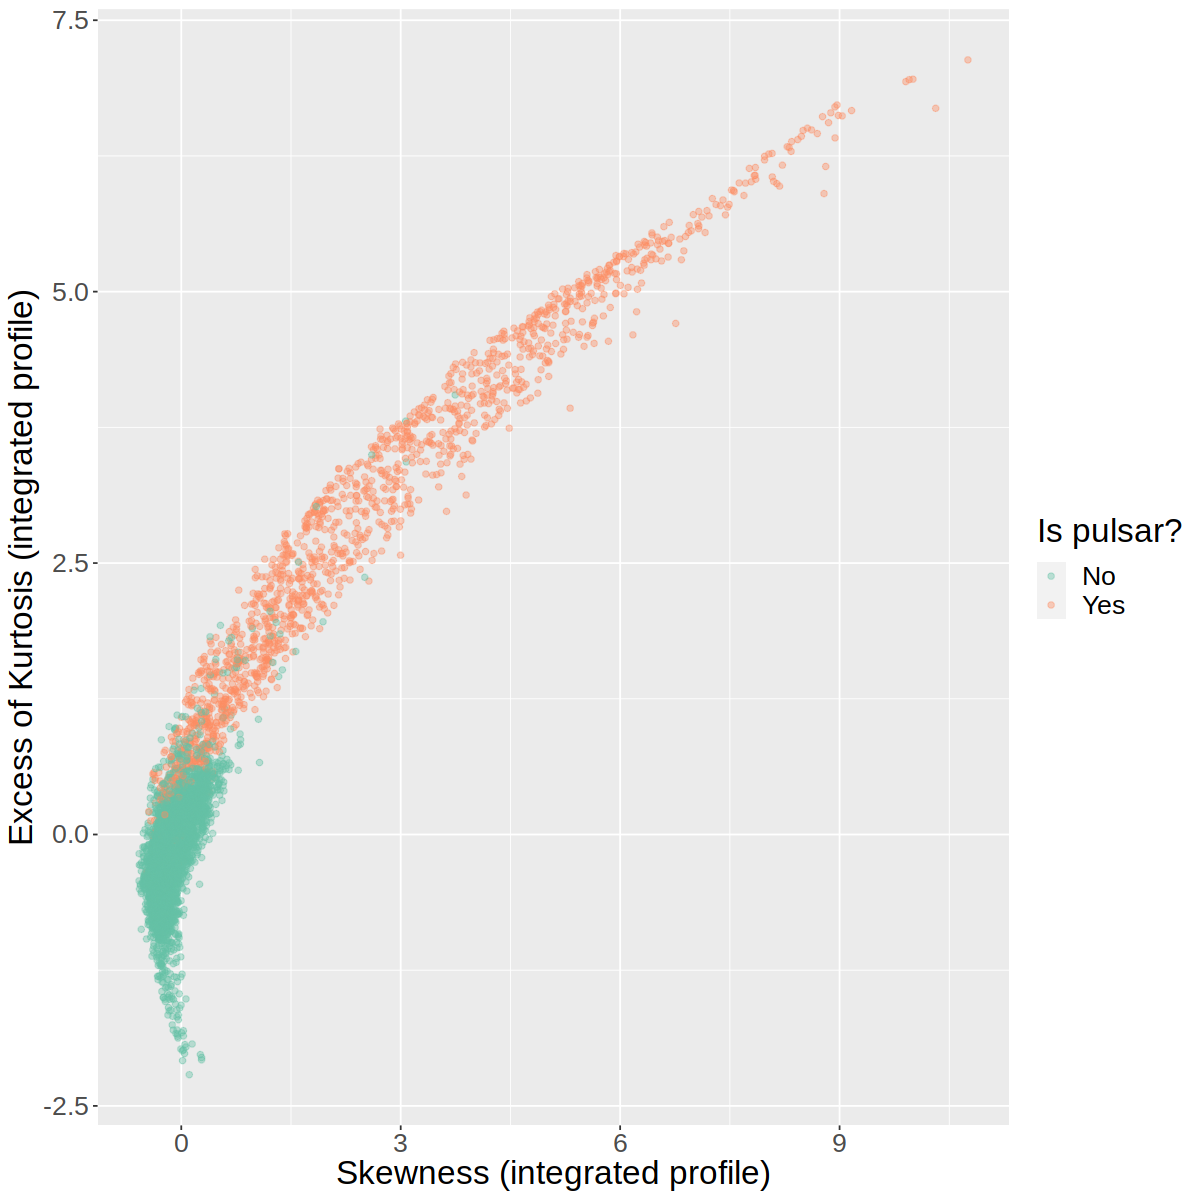

In [4]:
options(repr.plot.width = 10, repr.plot.height = 10)

star_plot_skew <- ggplot (scaled_star, aes(x = skew_ip, y = kurtosis_ip, color = pulsar)) +
                geom_point(alpha = 0.4) +
                labs(y = "Excess of Kurtosis (integrated profile)", x = "Skewness (integrated profile)", color = "Is pulsar?") + 
                theme(text = element_text(size = 20)) + 
                scale_color_brewer(palette = "Set2")


star_plot_skew